# Project 2 Starter

## Summary

Project 2 is to facilitate students practice of the following Data Science concepts:
- Train and tune classification model
- Perform feature engineering to improve model performance
- Explain/interpret and debug model


## Tasks

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
    - Encode numerical variables that come as strings, for example string `$100.01` should be converted to numerical value
- Encode categorical variables
- Split dataset to Train/Test/Validation. If you perform cross-validation while tuning hyper-parameters, you don't need validation dataset.
- Add engineered features. Simple encoding (Target encoding) for individual feature doesn't count to the 10 required engineered features
- Train and tune ML models
- Provide final metrics using Test (hold-out) dataset:
    - Classification: AUC
    - Confusion matrix for best F1
- Interpret final trained model using Test dataset:
    - Global feature importance using both Shapley values and permutation feature importance
    - Summary plot with Shapley values 
    - Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:
        - Label `0` is correctly identified
        - Label `0` is identified as `1`
        - Label `1` is correctly identified
        - Label `1` is identified as `0`
        - Significant probability means high probability of being correct/in-correct (depending on the scenario)

## Datasets

You are provided with the  dataset on eLearning. 
There were several changes made to the dataset: columns dropped/added. 

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied



**Don't use original datasets, use only dataset provided with project requirements in eLearning**

## Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format
    - Jupyter notebook in `html` format
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file

**Additional requirements:**
- Each cell in the notebook should have been run
- Use markdown to annotate and explain your code
- Use visualizations for ML explainability part


Your notebook should include explanations about your code and be designed to be easily followed. All results should be reproducible. Every cell with code should be run.

Once you are done with final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: you might want to first produce working code using small subset of the dataset to speed up debugging process.

## Models

You will need to train and tune two types of models:
- GBM (H2O)
- LightGBM. To install LightGBM, run following command from your terminal after activating class virtual environment:  `pip install lightgbm==3.3.5` 


You will train and tune 2 models for each task for the total of 2 final models. 


First, split he dataset to Train/Validation/Test, before applying any encodings clean-up or feature engineering. 
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


### Categorical variables encoding

Encode categorical variables using either one of the techniques below. Don't use LabelEncoder.
- One-hot-encoder for variables with less than 10 valid values. Name your new columns "Original_name"_valid_value
- (If using sklearn) Target encoder from the following library: https://contrib.scikit-learn.org/category_encoders/index.html . Name your new column "Original_name"_trg
- (If using H2O) Use H2O target encoder


Example of use for target encoder:
```
import category_encoders as ce

encoder = ce.TargetEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

### Feature engineering

You should train/fit categorical features encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.
Your final model should have at least **10** new engineered features. One-hot-encoding, label encoding, and target encoding is not included in the **10** features.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)

### Model Tuning

Perform hyper parameter tuning for both models.
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 150 combinations or 150 Optuna trials.
- To avoid over-fitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training. Not needed if you perform cross-validation.
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. You should add at least two engineered features.  For example, add feature which is combination of two features.
- Calculate probability threshold to maximize F1.

It should be clearly stated what parameters were selected after hyper parameters tuning. If using early stopping, make sure final model is trained with proper parameters that include number of iterations.

To simplify scoring, train single model on provided full dataset with parameters and features found in the Tuning stage.

## Scoring Function

You only need to submit single scoring function for either GBM or LightGBM model.
The scoring function will perform the following activities:
- Accept dataset in the same format as provided with the project, minus "target" column
- Load trained model and any encoders that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record in a similar way as in Project 1:
    - Record label as determined by final model
    - You need to assign label based on maximum F1 threshold
    - Probability 

```
index	label	probability_0	probability_1
1	      0	        0.901298	0.098702
2	      1	        0.071879	0.928121
3	      1	        0.367665	0.632335
4	      1	        0.098564	0.901436
5	      0	        0.923460	0.076540
```

See Project 1 for more details on scoring function and working example.

### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.


### Model interpretation

You should provide detailed write-up on what features are important for the model predictions. Your write-up should be written in "english" and in the way business manager can understand how the model works.
At the minimum include:
- Shapley summary graph: `shap.plots.beeswarm` 
- Shapley feature interaction graphs: `shap.plots.scatter` 
- Multiple examples of single records Shapley graphs with explanations. 
- Strong/Weak points of the model
- Are there any scenarios (particular input data) that will require over-write model prediction? 

Resources: https://github.com/slundberg/shap


### Model performance in H2O Driverless AI (performance to aim for)

I run experiments in DAI without any data manipulation. It means that potential improvement in performance can be gained after data is cleaned. 
AUC on cross-validation dataset: 0.8515
AUC on hold-out (not provided, will be evaluated on during grading): 0.855

Three top features:
- CVTE:Bank:BankState:FranchiseCode:SBA_Appv.0
- CVTE:Bank:BankState:NAICS:UrbanRural.0
- WoE:Bank:BankState:NAICS.0


CVTE: cross-validated target encoding
WoE : weight of evidence 

## Save all artifacts

Save all artifacts needed for scoring function:
- Trained model
- Encoders

You should restart your Kernel to properly test scoring function

## Model Scoring

Use example scoring function from Project 1 as the reference. 


## Load Data example

In [1]:
import pandas as pd

data = pd.read_csv("./data/SBA_loans_project_2.zip")
data = data.drop(columns=['index']) #Removing the index column 

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.ensemble import GradientBoostingClassifier
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from h2o.grid.grid_search import H2OGridSearch
import lightgbm as lgb
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from h2o.frame import H2OFrame
from h2o.model.metrics import H2OBinomialModelMetrics
from sklearn.metrics import accuracy_score
from h2o.metrics import H2OF1Score, H2OAUC


In [3]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)

train_data, val_data = train_test_split(train_data, test_size=0.3, random_state=123)

data= train_data


In [4]:
data.head()

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status
670727,WARNER,NH,3278,LEDYARD NATIONAL BANK,VT,446110,0,2.0,3,0,0,2,N,N,"$100,000.00",$0.00,"$100,000.00","$90,000.00",5,0
747876,MILLEDGEVILLE,GA,31061,"FIRST WESTERN SBLC, INC",TX,0,59,1.0,0,0,38600,1,N,N,"$1,000,000.00",$0.00,"$1,000,000.00","$750,000.00",5,1
690335,CULVER CITY,CA,90232,COMMUNITY BANK,CA,541922,2,1.0,0,0,1,1,0,Y,"$115,000.00",$0.00,"$115,000.00","$97,750.00",3,0
138384,ROSEVILLE,MI,48066,JPMORGAN CHASE BANK NATL ASSOC,IL,0,6,1.0,0,0,1,1,N,N,"$175,000.00",$0.00,"$175,000.00","$157,500.00",5,0
274759,TIVERTON,RI,2878,CITIZENS BANK NATL ASSOC,MA,541611,2,1.0,0,0,1,0,0,N,"$18,000.00",$0.00,"$18,000.00","$9,000.00",6,0


In [5]:
(data['MIS_Status'].value_counts()) / len(data) * 100

0    82.418416
1    17.581584
Name: MIS_Status, dtype: float64

In [6]:
print(data['MIS_Status'].unique())

[0 1]


In [7]:
data.isnull().sum()

City                   16
State                   6
Zip                     0
Bank                  746
BankState             749
NAICS                   0
NoEmp                   0
NewExist               68
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            2297
LowDoc               1314
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
LoanInd                 0
MIS_Status              0
dtype: int64

In [8]:
# Cleaning the train dataset
#There are no null values in these four columns, so I am going ahead and Converting the strings styled as '$XXXX.XX' to float values. Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
convertables = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

for col in convertables:
    train_data[col] = train_data[col].str.replace('$', '')
    train_data[col] = train_data[col].str.replace(' ', '')
    train_data[col] = train_data[col].str.replace(',', '')
    
train_data = train_data.astype({'DisbursementGross': 'float', 'BalanceGross': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

# Removing records where RevLineCr not equals 'Y' or 'N' and LowDoc not equals 'Y' or 'N'
train_data = train_data[(train_data['RevLineCr'] == 'Y') | (train_data['RevLineCr'] == 'N')]
train_data = train_data[(train_data['LowDoc'] == 'Y') | (train_data['LowDoc'] == 'N')]

#Replacing Y with 1 and N with 0, in these two columns 
train_data['RevLineCr'] = train_data['RevLineCr'].replace({'Y': 1, 'N': 0})
train_data['LowDoc'] = train_data['LowDoc'].replace({'Y': 1, 'N': 0})

#Franchise code, (00000 or 00001) = No franchise,(from data description),therefore I will create a new column called 'Franchise_Exists' where I can know just
#that franchise exists or not.
train_data.loc[(train_data['FranchiseCode'] <= 1), 'Franchise_Exists'] = 0
train_data.loc[(train_data['FranchiseCode'] > 1), 'Franchise_Exists'] = 1
train_data['Franchise_Exists'] = train_data['Franchise_Exists'].astype(int)
train_data = train_data.drop('FranchiseCode', axis=1)#drop franchise code

#cONVERTING NEWEXIST TO 0 AND 1'S , 
unique_values = train_data['NewExist'].unique()
valid_values = [val for val in unique_values if val in [1, 2]]
train_data = train_data[train_data['NewExist'].isin(valid_values)]
train_data['NewExist'] = train_data['NewExist'].replace({1.: 0, 2.: 1}).astype(int)

#Replacing null values 
train_data.isnull().sum()
filler = {}
for col in train_data.drop(columns=['MIS_Status']).columns:
    if train_data[col].dtype == 'object':
        filler[col] = "UnKnown Value"
    else:
        filler[col] = 0

train_data.fillna(value=filler, inplace=True)
train_data.isnull().sum()

#FROM MY UNDERSTANDING OF THE NAICS CODES, THE FIRST TWO DIGITS SIGNIFY THE INDUSTRY RELATED TO THE BUSINESS,WHICH WHAT WE REQUIRE
#REPLACING NAICS COLUMN WITH FIRST TWO DIGITS AND DROPPING WHERE NAICS=0
# Replace NAICS values
train_data['NAICS'] = train_data['NAICS'].apply(lambda x: str(x)[:2] if x != 0 else 0)
train_data = train_data[train_data['NAICS'] != 0]
# let us create one feature where we have percentage of loan approved by SBA with respect to total Gross approved.
train_data['percent_approved'] = train_data['SBA_Appv'] / train_data['GrAppv']

scaler = StandardScaler()
cols_to_scale = ['SBA_Appv', 'GrAppv', 'NoEmp', 'RetainedJob', 'CreateJob', 'LoanInd', 'percent_approved','DisbursementGross','BalanceGross']
# Scaling the selected columns in feature datasets
train_data[cols_to_scale] = scaler.fit_transform(train_data[cols_to_scale])

target_encoder = ce.TargetEncoder(cols=["Zip", "City", "NAICS", 'Bank', 'BankState', 'State', 'UrbanRural','LowDoc','RevLineCr','Franchise_Exists','NewExist'])
train_data= target_encoder.fit_transform(train_data, train_data["MIS_Status"])

for col in ["Zip", "City", "NAICS", 'Bank', 'BankState', 'State', 'UrbanRural','LowDoc','RevLineCr','Franchise_Exists','NewExist']:
    new_col_name = col + "_trg"
    train_data.rename(columns={col: new_col_name}, inplace=True)



The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [9]:
train_data.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp,NewExist_trg,CreateJob,RetainedJob,...,RevLineCr_trg,LowDoc_trg,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status,Franchise_Exists_trg,percent_approved
670727,0.193474,0.136480,0.198840,0.095788,0.055446,0.244045,-0.164775,0.213822,0.063902,-0.273143,...,0.181049,0.223624,-0.262288,-0.003165,-0.206851,-0.125808,0.002733,0,0.215896,1.380243
294737,0.407142,0.263163,0.443152,0.281013,0.296255,0.244045,-0.098919,0.214197,0.179090,-0.046070,...,0.259644,0.223624,-0.571378,-0.003165,-0.534085,-0.512053,-1.339714,0,0.215896,-0.850075
410384,0.164539,0.272342,0.219629,0.088545,0.096795,0.246253,-0.033063,0.214197,0.121496,0.181003,...,0.259644,0.223624,0.233354,-0.003165,-0.206851,-0.313078,-0.892232,0,0.215896,-0.850075
776245,0.149838,0.237234,0.112490,0.057781,0.192226,0.200663,-0.082455,0.214197,0.063902,0.010698,...,0.259644,0.223624,-0.262288,-0.003165,-0.206851,-0.313078,0.002733,0,0.215896,-0.850075
329525,0.207054,0.178093,0.222178,0.226640,0.193498,0.205845,-0.148311,0.214197,-0.108881,-0.216375,...,0.259644,0.223624,-0.314349,-0.003165,-0.457089,-0.465235,0.002733,1,0.215896,-0.850075


In [10]:
# Cleaning and encoding the validation dataset

# Convert strings styled as '$XXXX.XX' to float values in specific columns
convertables = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
for col in convertables:
    val_data[col] = val_data[col].str.replace('$', '')
    val_data[col] = val_data[col].str.replace(' ', '')
    val_data[col] = val_data[col].str.replace(',', '')
val_data = val_data.astype({'DisbursementGross': 'float', 'BalanceGross': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

# Removing records where RevLineCr not equals 'Y' or 'N' and LowDoc not equals 'Y' or 'N'
val_data = val_data[(val_data['RevLineCr'] == 'Y') | (val_data['RevLineCr'] == 'N')]
val_data = val_data[(val_data['LowDoc'] == 'Y') | (val_data['LowDoc'] == 'N')]

# Replace 'Y' with 1 and 'N' with 0 in these two columns
val_data['RevLineCr'] = val_data['RevLineCr'].replace({'Y': 1, 'N': 0})
val_data['LowDoc'] = val_data['LowDoc'].replace({'Y': 1, 'N': 0})

# Create a new column called 'Franchise_Exists' to determine if a franchise exists or not
val_data.loc[(val_data['FranchiseCode'] <= 1), 'Franchise_Exists'] = 0
val_data.loc[(val_data['FranchiseCode'] > 1), 'Franchise_Exists'] = 1
val_data['Franchise_Exists'] = val_data['Franchise_Exists'].astype(int)
val_data = val_data.drop('FranchiseCode', axis=1)

# Convert 'NewExist' column to 0 and 1
unique_values = val_data['NewExist'].unique()
valid_values = [val for val in unique_values if val in [1, 2]]
val_data = val_data[val_data['NewExist'].isin(valid_values)]
val_data['NewExist'] = val_data['NewExist'].replace({1.: 0, 2.: 1}).astype(int)

# Replacing null values
filler = {}
for col in val_data.drop(columns=['MIS_Status']).columns:
    if val_data[col].dtype == 'object':
        filler[col] = "UnKnown Value"
    else:
        filler[col] = 0
val_data.fillna(value=filler, inplace=True)

# Replace NAICS values with the first two digitd to identify industry
val_data['NAICS'] = val_data['NAICS'].apply(lambda x: str(x)[:2] if x != 0 else 0)
val_data = val_data[val_data['NAICS'] != 0]

# Creating a feature for the percentage of loan approved by SBA with respect to total Gross approved
val_data['percent_approved'] = val_data['SBA_Appv'] / val_data['GrAppv']

# Scaling selected columns in the dataset
cols_to_scale = ['SBA_Appv', 'GrAppv', 'NoEmp', 'RetainedJob', 'CreateJob', 'LoanInd', 'percent_approved', 'DisbursementGross', 'BalanceGross']
val_data[cols_to_scale] = scaler.transform(val_data[cols_to_scale])

#target encoding
val_data = target_encoder.transform(val_data)

for col in ["Zip", "City", "NAICS", 'Bank', 'BankState', 'State', 'UrbanRural', 'LowDoc', 'RevLineCr', 'Franchise_Exists', 'NewExist']:
    new_col_name = col + "_trg"
    val_data.rename(columns={col: new_col_name}, inplace=True)



The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [11]:
#Cleaning and encoding test data
# Convert strings styled as '$XXXX.XX' to float values in specific columns
convertables = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
for col in convertables:
    test_data[col] = test_data[col].str.replace('$', '')
    test_data[col] = test_data[col].str.replace(' ', '')
    test_data[col] = test_data[col].str.replace(',', '')
test_data = test_data.astype({'DisbursementGross': 'float', 'BalanceGross': 'float', 'GrAppv': 'float', 'SBA_Appv': 'float'})

# Removing records where RevLineCr not equals 'Y' or 'N' and LowDoc not equals 'Y' or 'N'
test_data = test_data[(test_data['RevLineCr'] == 'Y') | (test_data['RevLineCr'] == 'N')]
test_data = test_data[(test_data['LowDoc'] == 'Y') | (test_data['LowDoc'] == 'N')]

# Replacing 'Y' with 1 and 'N' with 0 in these two columns
test_data['RevLineCr'] = test_data['RevLineCr'].replace({'Y': 1, 'N': 0})
test_data['LowDoc'] = test_data['LowDoc'].replace({'Y': 1, 'N': 0})

# Create a new column called 'Franchise_Exists' to determine if a franchise exists or not
test_data.loc[(test_data['FranchiseCode'] <= 1), 'Franchise_Exists'] = 0
test_data.loc[(test_data['FranchiseCode'] > 1), 'Franchise_Exists'] = 1
test_data['Franchise_Exists'] = test_data['Franchise_Exists'].astype(int)
test_data = test_data.drop('FranchiseCode', axis=1)

# Convert 'NewExist' column to 0 and 1
unique_values = test_data['NewExist'].unique()
valid_values = [val for val in unique_values if val in [1, 2]]
test_data = test_data[test_data['NewExist'].isin(valid_values)]
test_data['NewExist'] = test_data['NewExist'].replace({1.: 0, 2.: 1}).astype(int)

# Replace null values
filler = {}
for col in test_data.drop(columns=['MIS_Status']).columns:
    if test_data[col].dtype == 'object':
        filler[col] = "UnKnown Value"
    else:
        filler[col] = 0
test_data.fillna(value=filler, inplace=True)

# Replace NAICS values
test_data['NAICS'] = test_data['NAICS'].apply(lambda x: str(x)[:2] if x != 0 else 0)
test_data = test_data[test_data['NAICS'] != 0]

# Creating a feature for the percentage of loan approved by SBA with respect to total Gross approved
test_data['percent_approved'] = test_data['SBA_Appv'] / test_data['GrAppv']

# Scale selected columns in the dataset
cols_to_scale = ['SBA_Appv', 'GrAppv', 'NoEmp', 'RetainedJob', 'CreateJob', 'LoanInd', 'percent_approved', 'DisbursementGross', 'BalanceGross']
test_data[cols_to_scale] = scaler.transform(test_data[cols_to_scale])

# Apply target encoding
test_data = target_encoder.transform(test_data)

for col in ["Zip", "City", "NAICS", 'Bank', 'BankState', 'State', 'UrbanRural', 'LowDoc', 'RevLineCr', 'Franchise_Exists', 'NewExist']:
    new_col_name = col + "_trg"
    test_data.rename(columns={col: new_col_name}, inplace=True)


The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [12]:
test_data.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp,NewExist_trg,CreateJob,RetainedJob,...,RevLineCr_trg,LowDoc_trg,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status,Franchise_Exists_trg,percent_approved
649953,0.160001,0.167058,0.149963,0.133662,0.288637,0.200663,0.082186,0.214197,-0.108881,-0.273143,...,0.181049,0.050228,-0.280645,-0.003165,-0.226100,-0.191353,-0.444749,0,0.215896,0.822664
779885,0.214098,0.113125,0.186242,0.133267,0.074534,0.143136,-0.131847,0.214197,-0.108881,-0.159606,...,0.181049,0.223624,-0.592716,-0.003165,-0.553334,-0.523757,-0.892232,0,0.215896,-0.850075
436186,0.279020,0.322707,0.357613,0.183984,0.233301,0.245810,-0.049527,0.214197,-0.108881,0.124235,...,0.259644,0.223624,-0.545296,-0.003165,-0.534085,-0.512053,0.450215,0,0.215896,-0.850075
668099,0.163121,0.138070,0.204767,0.323230,0.275977,0.103936,-0.082455,0.214197,0.006308,0.124235,...,0.181049,0.223624,-0.106253,-0.003165,-0.043235,-0.213591,-0.892232,0,0.215896,-0.850075
783328,0.331348,0.273573,0.194552,0.323230,0.275977,0.232712,-0.131847,0.213822,-0.108881,-0.159606,...,0.181049,0.223624,-0.591615,-0.003165,-0.552179,-0.523055,2.687625,1,0.215896,-0.850075


# Training and Tuning using the two models

In [15]:
h2o.init(nthreads=4, max_mem_size=12)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 38 mins
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,4 months and 2 days !!!
H2O_cluster_name:,H2O_from_python_axk220013_o7m6b5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.578 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [16]:
train_data_h20 = h2o.H2OFrame(train_data)
val_data_h20 = h2o.H2OFrame(val_data)
test_data_h20 = h2o.H2OFrame(test_data)
train_data_h20.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp,NewExist_trg,CreateJob,RetainedJob,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status,Franchise_Exists_trg,percent_approved
0.193474,0.13648,0.19884,0.0957879,0.0554455,0.244045,-0.164775,0.213822,0.0639019,-0.273143,0.205874,0.181049,0.223624,-0.262288,-0.00316526,-0.206851,-0.125808,0.00273253,0,0.215896,1.38024
0.407142,0.263163,0.443152,0.281013,0.296255,0.244045,-0.0989188,0.214197,0.17909,-0.0460698,0.280771,0.259644,0.223624,-0.571378,-0.00316526,-0.534085,-0.512053,-1.33971,0,0.215896,-0.850075
0.164539,0.272342,0.219629,0.0885454,0.0967953,0.246253,-0.0330626,0.214197,0.121496,0.181003,0.280771,0.259644,0.223624,0.233354,-0.00316526,-0.206851,-0.313078,-0.892232,0,0.215896,-0.850075
0.149838,0.237234,0.11249,0.0577812,0.192226,0.200663,-0.0824548,0.214197,0.0639019,0.0106985,0.280771,0.259644,0.223624,-0.262288,-0.00316526,-0.206851,-0.313078,0.00273253,0,0.215896,-0.850075
0.207054,0.178093,0.222178,0.22664,0.193498,0.205845,-0.148311,0.214197,-0.108881,-0.216375,0.280771,0.259644,0.223624,-0.314349,-0.00316526,-0.457089,-0.465235,0.00273253,1,0.215896,-0.850075
0.168581,0.165367,0.178342,0.281013,0.296255,0.246253,-0.148311,0.214197,-0.108881,-0.216375,0.280771,0.259644,0.223624,-0.411715,-0.00316526,-0.457089,-0.465235,-0.892232,0,0.215896,-0.850075
0.367601,0.322707,0.305087,0.41416,0.284219,0.244045,-0.131847,0.214197,-0.108881,-0.273143,0.0439162,0.181049,0.223624,-0.274037,-0.00316526,-0.219171,-0.139292,1.34518,0,0.215896,1.38024
0.135432,0.167113,0.170184,0.126437,0.125621,0.143136,-0.131847,0.214197,0.00630767,-0.159606,0.280771,0.259644,0.223624,-0.462803,-0.00316526,-0.43784,-0.453531,1.79266,0,0.215896,-0.850075
0.143284,0.137837,0.235121,0.938809,0.123081,0.25082,-0.164775,0.213822,1.61895,-0.273143,0.280771,0.259644,0.223624,-0.390788,-0.00316526,-0.399342,-0.430122,-0.444749,1,0.215896,-0.850075
0.2372,0.13648,0.220128,9.89766e-13,0.0641781,0.244045,-0.0659907,0.214197,-0.108881,0.0674667,0.280771,0.181049,0.223624,-0.328374,-0.00316526,-0.276148,-0.163262,-2.23468,0,0.215896,1.93782


In [46]:
val_data_h20.head()

City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp,NewExist_trg,CreateJob,RetainedJob,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LoanInd,MIS_Status,Franchise_Exists_trg,percent_approved
0.155054,0.208066,0.126075,0.0699635,0.119792,0.326014,-0.164775,0.214197,-0.108881,-0.273143,0.280771,0.181049,0.223624,1.77902,-0.00316526,1.93364,1.75626,0.00273253,0,0.215896,0.543874
0.220128,0.165367,0.248011,0.196349,0.0971635,0.200663,-0.148311,0.213822,-0.108881,-0.273143,0.0439162,0.181049,0.223624,-0.445859,-0.00316526,-0.399342,-0.359896,0.00273253,0,0.215896,0.822664
0.164368,0.183777,0.0735747,0.281013,0.296255,0.205845,-0.0824548,0.213822,-0.108881,0.0106985,0.280771,0.259644,0.223624,-0.406579,-0.00316526,-0.43014,-0.448849,-0.892232,1,0.215896,-0.850075
0.273183,0.214714,0.27867,0.207469,0.209955,0.200663,-0.148311,0.214197,-0.108881,-0.216375,0.280771,0.259644,0.223624,-0.562115,-0.00316526,-0.553334,-0.523757,-0.444749,0,0.215896,-0.850075
0.270654,0.220432,0.248011,0.115314,0.296255,0.103936,-0.148311,0.213822,-0.108881,-0.273143,0.280771,0.181049,0.223624,-0.067703,-0.00316526,0.0664845,0.0532688,-0.444749,0,0.215896,0.543874
0.380342,0.263163,0.255119,0.273735,0.282244,0.198752,-0.0659907,0.214197,0.00630767,0.0674667,0.280771,0.259644,0.223624,0.277411,-0.00316526,-0.206851,-0.313078,-0.444749,0,0.215896,-0.850075
0.145648,0.183777,0.14618,0.237402,0.0807544,0.143136,-0.0824548,0.214197,-0.108881,0.0106985,0.280771,0.181049,0.223624,0.279246,-0.00316526,0.360994,0.321884,0.00273253,1,0.215896,0.543874
0.191176,0.13648,0.207054,0.258067,0.0715689,0.24581,-0.0824548,0.214197,-0.108881,0.0106985,0.280771,0.259644,0.223624,-0.458397,-0.00316526,-0.553334,-0.523757,-1.33971,1,0.215896,-0.850075
0.300005,0.237234,0.315423,0.32323,0.275977,0.198752,-0.115383,0.213822,-0.0512866,-0.102838,0.280771,0.259644,0.223624,-0.537645,-0.00316526,-0.495587,-0.488644,0.897697,1,0.215896,-0.850075
0.236025,0.197272,0.159996,0.131393,0.193498,0.103936,-0.115383,0.214197,-0.108881,-0.102838,0.280771,0.259644,0.223624,-0.438028,-0.00316526,-0.453239,-0.462895,0.450215,0,0.215896,-0.850075


In [17]:
print(train_data_h20.columns[-3])

MIS_Status


In [66]:
response = "MIS_Status"

train_data_h20[response]= train_data_h20[response].asfactor()
val_data_h20[response] = val_data_h20[response].asfactor()
test_data_h20[response] = test_data_h20[response].asfactor()

In [ ]:
predictors_gbm = train_data_h20.columns
predictors_gbm.remove(response)

gbm_model = H2OGradientBoostingEstimator(nfolds=5,
                                         ntrees=500,
                                         stopping_rounds=5,
                                         stopping_metric='AUCPR',
                                         seed=1234,
                                         keep_cross_validation_predictions = False)

gbm_model.train(x=predictors_gbm, y=response, training_frame=train_data_h20)

# retrieve the model performance
perf = gbm_model.model_performance(val_data_h20)
print(perf)


In [21]:
predictors_gbm = train_data_h20.columns
predictors_gbm.remove(response)

hyper_params = {
    'ntrees': [50, 100, 150],
   
    'stopping_rounds': [3, 5],
}

grid_search = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    hyper_params=hyper_params,
    search_criteria={'strategy': 'RandomDiscrete', 'max_models': 50, 'stopping_metric': 'AUCPR'}
)

grid_search.train(x=predictors_gbm, y=response, training_frame=train_data_h20)

best_model = grid_search.models[0]
perf = best_model.model_performance(val_data_h20)

print("Best Model Hyperparameters:")
print(best_model.actual_params)

print("Best Model Performance:")
print(perf)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Best Model Hyperparameters:
{'model_id': 'Grid_GBM_py_2_sid_924c_model_python_1683498529415_2127_model_1', 'training_frame': 'py_2_sid_924c', 'validation_frame': None, 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'score_each_iteration': False, 'score_tree_interval': 0, 'fold_assignment': None, 'fold_column': None, 'response_column': 'MIS_Status', 'ignored_columns': None, 'ignore_const_cols': True, 'offset_column': None, 'weights_column': None, 'balance_classes': False, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'ntrees': 150, 'max_depth': 5, 'min_rows': 10.0, 'nbins': 20, 'nbins_top_level': 1024, 'nbins_cats': 1024, 'r2_stopping': 1.7976931348623157e+308, 'stopping_rounds': 5, 'stopping_metric': 'logloss', 'stopping_tolerance': 0.001, 'max_runt

In [27]:
response = "MIS_Status"
train_data[response] = train_data[response].astype('category')
val_data[response] = val_data[response].astype('category')


In [30]:
X_train = train_data.drop(response, axis=1)
y_train = train_data[response]

X_val = val_data.drop(response, axis=1)
y_val = val_data[response]


In [51]:
lgb_model = lgb.LGBMClassifier()
param_grid = {
    'learning_rate': [0.1, 0.05, 0.5, 1],
    'n_estimators': [ 500, 700, 1000],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100]
}


grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
confusion_mat = confusion_matrix(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)

print("Best Parameters:", best_params)
print("Best Model Performance (Validation Accuracy):", accuracy)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Confusion Matrix:")
print(confusion_mat)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 31}
Best Model Performance (Validation Accuracy): 0.8136768678682311
F1 Score: 0.4700080284436289
AUC Score: 0.6576560868378349
Confusion Matrix:
[[72524  5311]
 [13173  8196]]


In [53]:
predictors_gbm = train_data_h20.columns
predictors_gbm.remove(response)

hyper_params = {
   'ntrees': [ 100, 150,200,250],
    'max_depth': [3, 5, 7,10],
    'learn_rate': [0.1, 0.05, 0.5, 1],
    'min_rows': [1, 5, 10],
}

grid_search = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    hyper_params=hyper_params,
    search_criteria={'strategy': 'RandomDiscrete', 'max_models': 50, 'stopping_metric': 'AUCPR'}
)

grid_search.train(x=predictors_gbm, y=response, training_frame=train_data_h20)

best_model = grid_search.models[0]
perf = best_model.model_performance(val_data_h20)

print("Best Model Hyperparameters:")
print(best_model.actual_params)

print("Best Model Performance:")
print(perf)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Best Model Hyperparameters:
{'model_id': 'Grid_GBM_py_2_sid_924c_model_python_1683498529415_2743_model_3', 'training_frame': 'py_2_sid_924c', 'validation_frame': None, 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'score_each_iteration': False, 'score_tree_interval': 0, 'fold_assignment': None, 'fold_column': None, 'response_column': 'MIS_Status', 'ignored_columns': None, 'ignore_const_cols': True, 'offset_column': None, 'weights_column': None, 'balance_classes': False, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'ntrees': 150, 'max_depth': 5, 'min_rows': 10.0, 'nbins': 20, 'nbins_top_level': 1024, 'nbins_cats': 1024, 'r2_stopping': 1.7976931348623157e+308, 'stopping_rounds': 6, 'stopping_metric': 'logloss', 'stopping_tolerance': 0.001, 'max_runt

In [54]:
print("Best Model Hyperparameters:")
print({param: best_model.actual_params[param] for param in ['ntrees', 'max_depth', 'learn_rate', 'min_rows']})


Best Model Hyperparameters:
{'ntrees': 150, 'max_depth': 5, 'learn_rate': 0.1, 'min_rows': 10.0}


#The best model of GBM has better F1 score at max probaility threshold of  0.265438,: It also better AUC and accuracy scores than LightGBM

#Therefore I will use h2o GBM Model with hyperparameters: {'ntrees': 150, 'max_depth': 5, 'learn_rate': 0.1, 'min_rows': 10.0}

# Model Interpretations

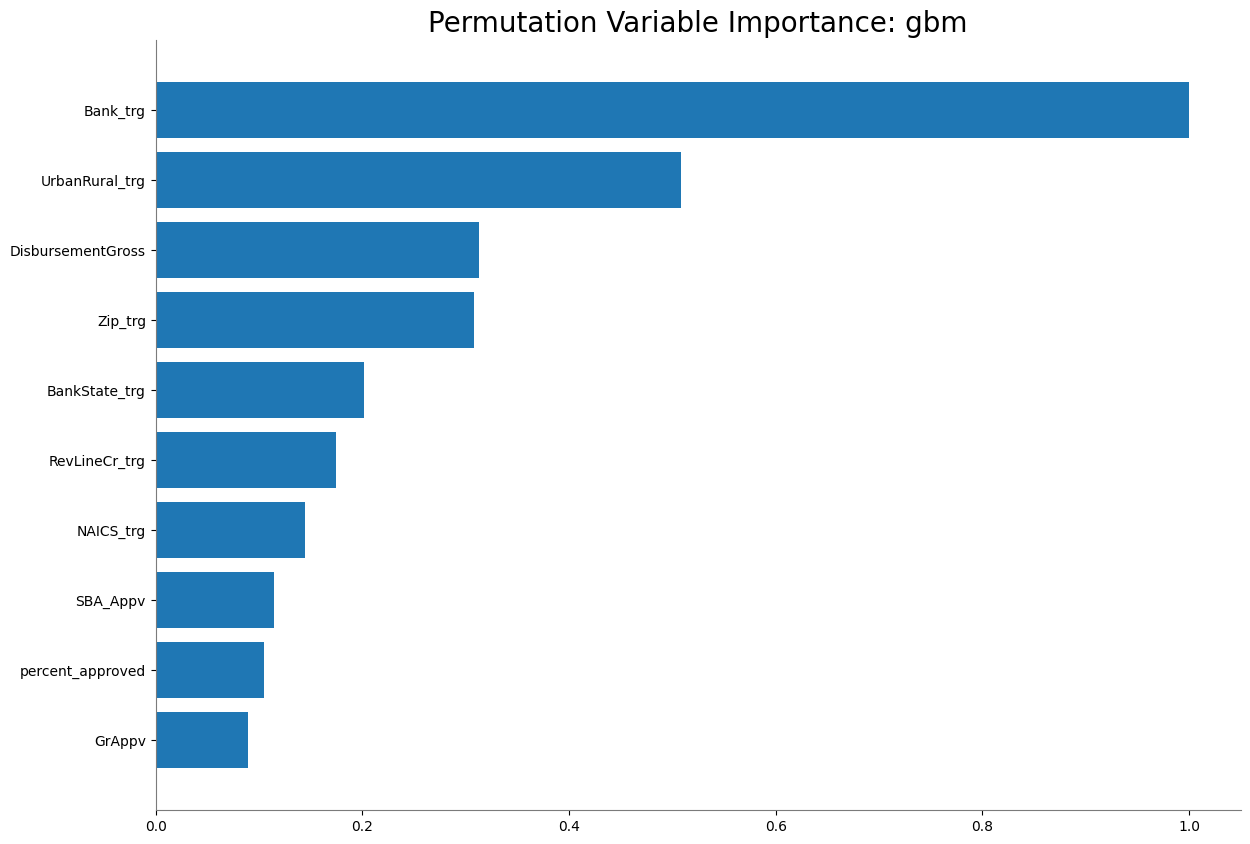

Variable,Relative Importance,Scaled Importance,Percentage
Bank_trg,0.0774727,1.0,0.3219266
UrbanRural_trg,0.0394148,0.5087569,0.1637824
DisbursementGross,0.0242537,0.3130617,0.1007829
Zip_trg,0.0238294,0.3075840,0.0990195
BankState_trg,0.0156398,0.2018747,0.0649889
RevLineCr_trg,0.0135273,0.1746071,0.0562107
NAICS_trg,0.0111551,0.1439875,0.0463534
SBA_Appv,0.0088714,0.1145104,0.0368640
percent_approved,0.0081442,0.1051237,0.0338421
GrAppv,0.0068874,0.0889015,0.0286198


In [56]:
# plot permutation importance (bar plot)
best_model.permutation_importance_plot(val_data_h20)

Looking Overall, the Bank, ZIP and Urban_Rural are the top 3 things to lookout for while decicding on wheather to give a loan or not. Industry to which the loan belongs to i.e NAICS, State to which the Bank belongs, and Revolving line of credit attributes well to predict the defaulters.

In [57]:
def examine_all_reason_codes(data, model):
    
    shap_contribs = model.predict_contributions(data)
    
    col_mapping = {}
    for i in data.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    
    #Convert to Pandas DF
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.summary_plot(shap_contribs[shap_cols].values, 
                             X[shap_cols].values,
                             feature_names=shap_cols,
                             alpha=0.2
                            )

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


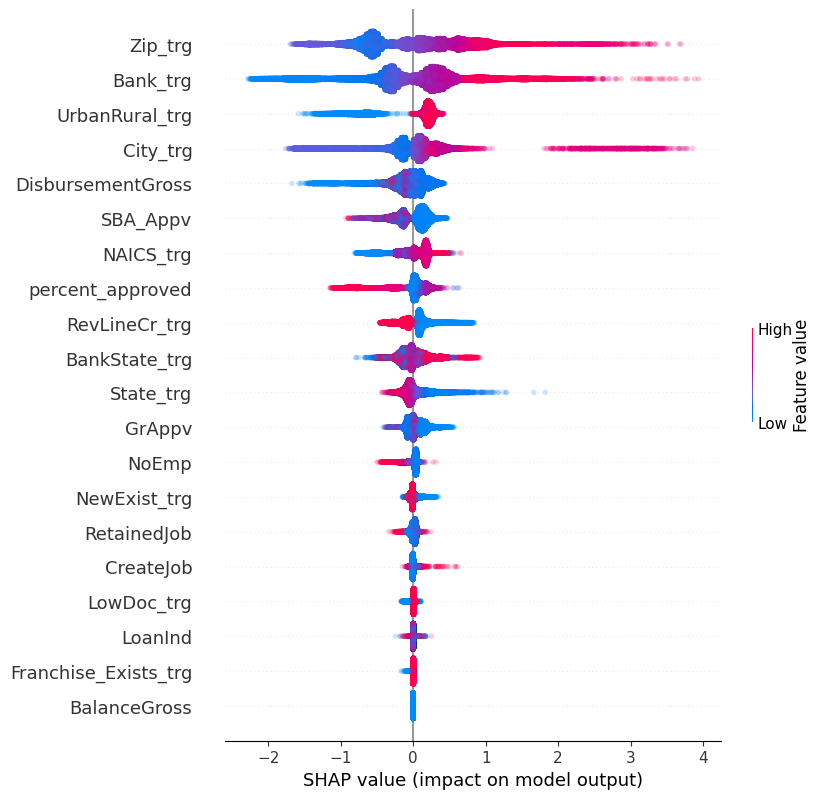

In [59]:
examine_all_reason_codes(val_data_h20, best_model)

The ZIP, Bank as expected from the previous observations have a high impact on the model output.

BalanceGross as the least impact on the output, which can be attributed to the fact that all its information is already present in "GrAppv" and DisbursementGross, i.e their difference is BalanceGross.Also,there are only 6 Non-Zero values in this column in the entire dataset.

In [60]:
def examine_indiv_reason_codes(record, model, use_matplotlib=True):
    
    shap_contribs = model.predict_contributions(record)
    
    col_mapping = {}
    for i in record.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = record.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.force_plot(bias_term, 
                           shap_contribs[shap_cols].values, 
                           X[shap_cols].values, 
                           shap_cols,
                           link="logit",
                           matplotlib=use_matplotlib
                          )

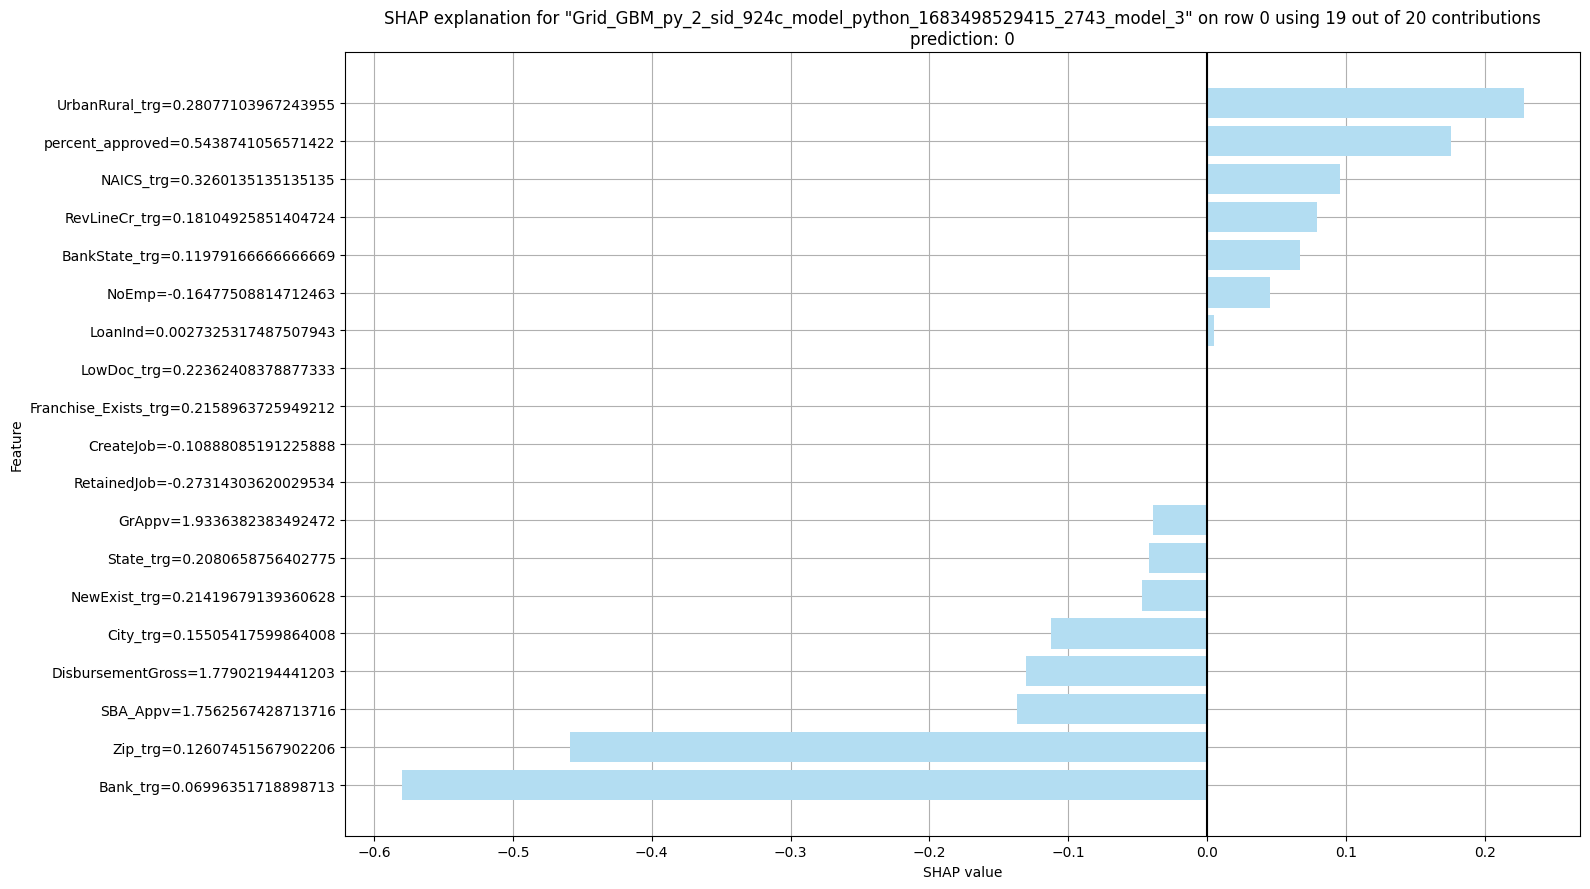

In [62]:
best_model.shap_explain_row_plot(val_data_h20, row_index=0)

For this instance, the Bank and the ZIP had a strong impact ( negatively in this case) as expected from previous observation that these are highly influential variables.

And the other high impact variable Urban_Rural also hight impact (positively in this case).

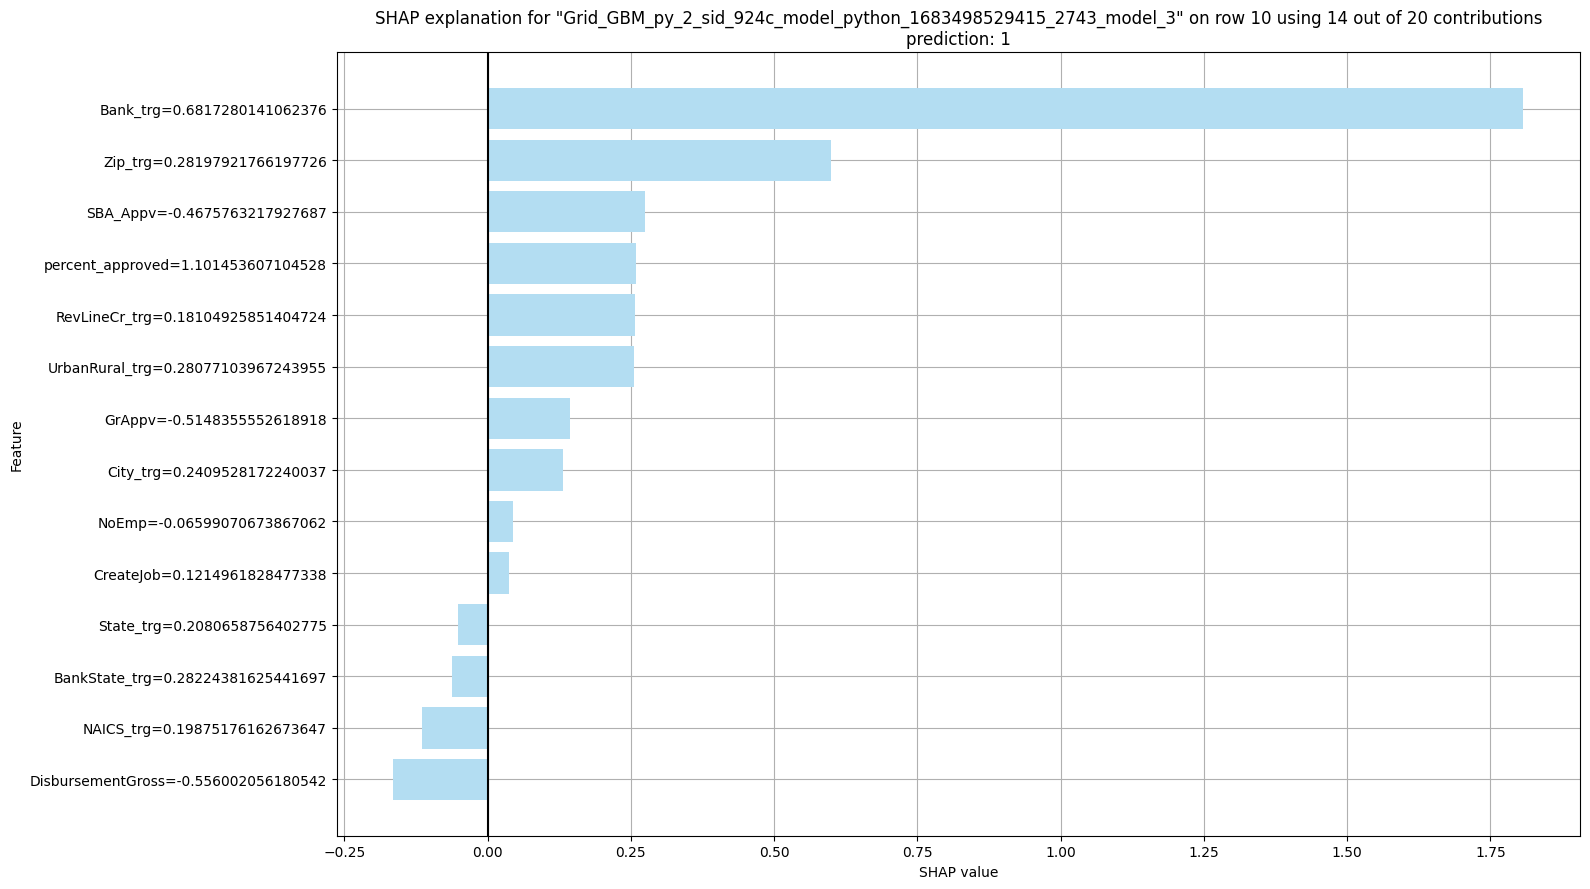

In [69]:
best_model.shap_explain_row_plot(val_data_h20, row_index=10)

#In this instance, the same Bank and the ZIP played very high impact positively.

#NAICS, a negative impact which might indicate attribute of that certain industry. This can be checked by looking up at the corresponding NAICS two Value to the industry.


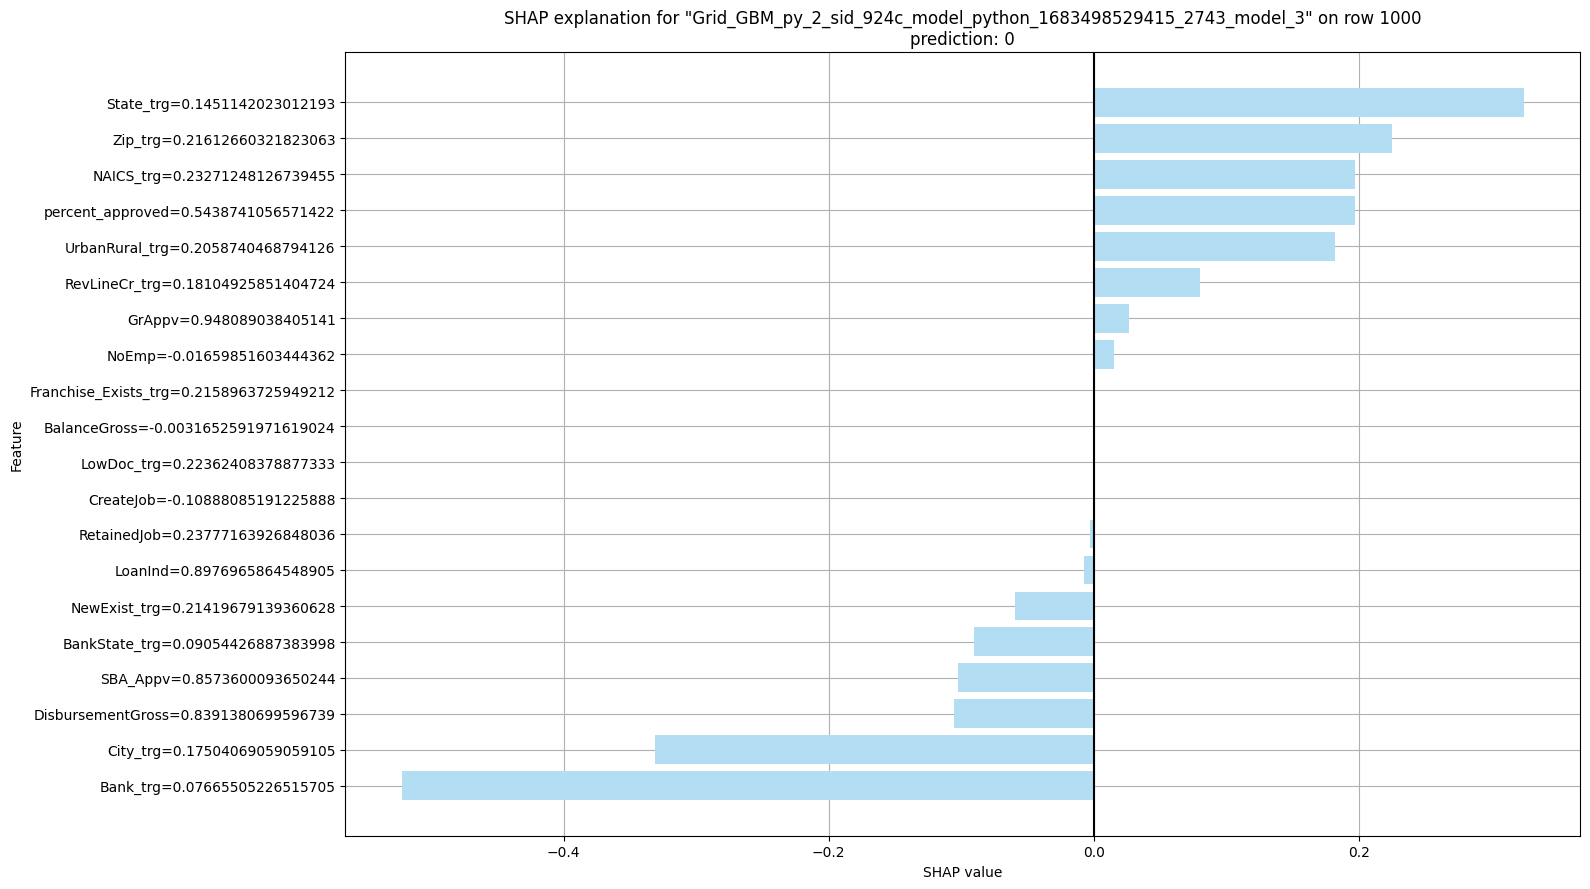

In [70]:
best_model.shap_explain_row_plot(val_data_h20, row_index=1000)

The above mentioned assumptions are further reinforced by this instance. i.e in these  instances Bank, ZIP, Urbal_Rural, NAICS,         percent_approved, RevLineCr, BankState are showing strong ividences of their impact on the loan being defaulted or not. 

#Evaluate performance on test data

In [68]:
perf_test = best_model.model_performance(test_data_h20)

print("Best Model Hyperparameters:")
print(best_model.actual_params)

print("Best Model Performance:")
print(perf_test)

Best Model Hyperparameters:
{'model_id': 'Grid_GBM_py_2_sid_924c_model_python_1683498529415_2743_model_3', 'training_frame': 'py_2_sid_924c', 'validation_frame': None, 'nfolds': 0, 'keep_cross_validation_models': True, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'score_each_iteration': False, 'score_tree_interval': 0, 'fold_assignment': None, 'fold_column': None, 'response_column': 'MIS_Status', 'ignored_columns': None, 'ignore_const_cols': True, 'offset_column': None, 'weights_column': None, 'balance_classes': False, 'class_sampling_factors': None, 'max_after_balance_size': 5.0, 'max_confusion_matrix_size': 20, 'ntrees': 150, 'max_depth': 5, 'min_rows': 10.0, 'nbins': 20, 'nbins_top_level': 1024, 'nbins_cats': 1024, 'r2_stopping': 1.7976931348623157e+308, 'stopping_rounds': 6, 'stopping_metric': 'logloss', 'stopping_tolerance': 0.001, 'max_runtime_secs': 0.0, 'seed': 5551167424965331728, 'build_tree_one_node': False, 'learn_rate': 0.1, '

Therefore, F1 score is 0.52 at  a max probability threshold of 0.27, the accuracy is 0.8132,and AUC is 0.79 on test dataset.

#Saving Scaling, Target encoding and Best Model

In [63]:
import pickle

# Saving the scaler, target encoder
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('target_encoder.pkl', 'wb') as file:
    pickle.dump(target_encoder, file)

In [65]:
#saving best model
h2o.save_model(best_model, "best_model_path")



'C:\\Users\\axk220013\\Downloads\\best_model_path\\Grid_GBM_py_2_sid_924c_model_python_1683498529415_2743_model_3'